In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
from google.colab import files
uploaded = files.upload()

Saving lending_club_info.csv to lending_club_info (1).csv


In [124]:
data_info = pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')

In [125]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [126]:
def feat_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [127]:
feat_info('mort_acc')

Number of mortgage accounts.


In [129]:
from google.colab import files
uploaded = files.upload()

Saving lending_club_loan_two.csv to lending_club_loan_two (1).csv


In [130]:
df = pd.read_csv('lending_club_loan_two.csv')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

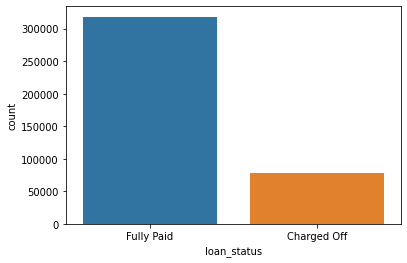

In [132]:
sns.countplot(x='loan_status', data = df)

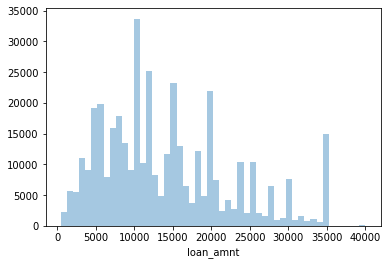

In [133]:
sns.distplot(df['loan_amnt'], kde= False)

In [134]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


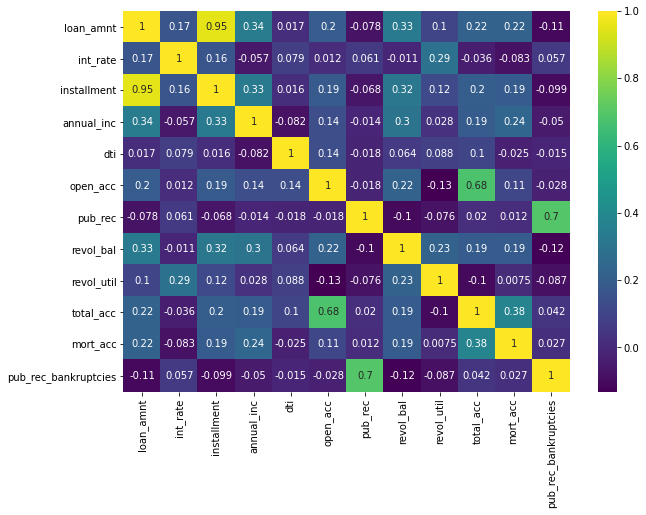

In [135]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [136]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [137]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


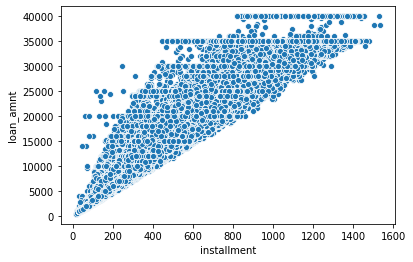

In [138]:
sns.scatterplot(x='installment', y = 'loan_amnt', data = df)

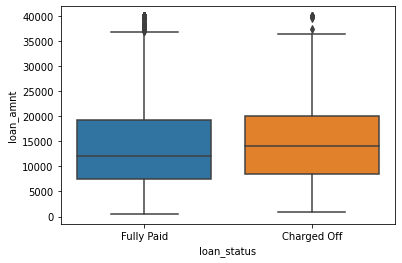

In [139]:
sns.boxplot(x='loan_status', y = 'loan_amnt', data = df)

In [140]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [141]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [142]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [143]:
feat_info('sub_grade')

LC assigned loan subgrade


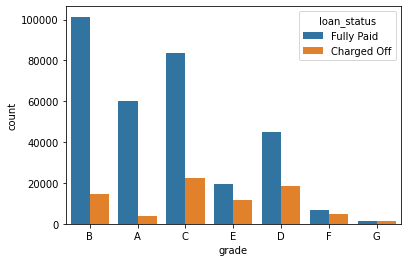

In [144]:
sns.countplot(x='grade', data=df, hue='loan_status')

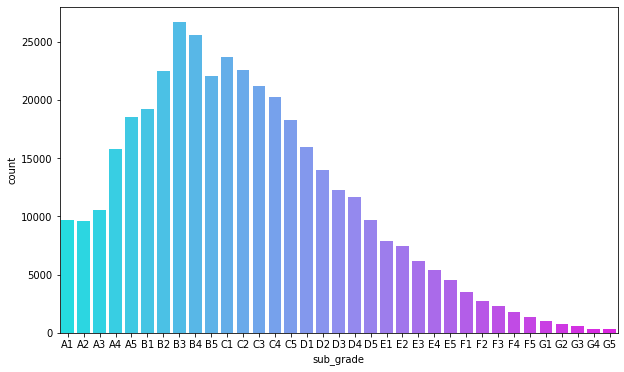

In [145]:
plt.figure(figsize=(10,6))
sub_grade_ord = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=sub_grade_ord, palette = 'cool')

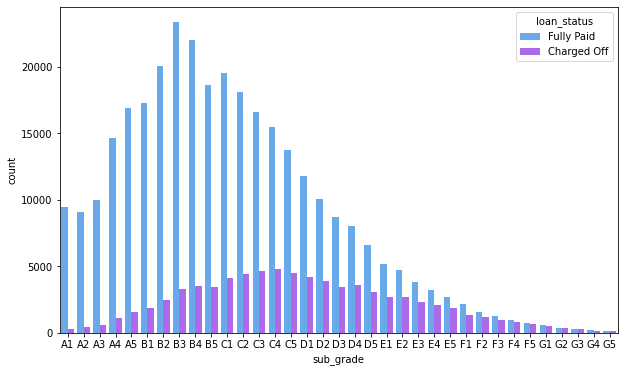

In [146]:
plt.figure(figsize=(10,6))
sub_grade_ord = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=sub_grade_ord, palette = 'cool', hue = 'loan_status')

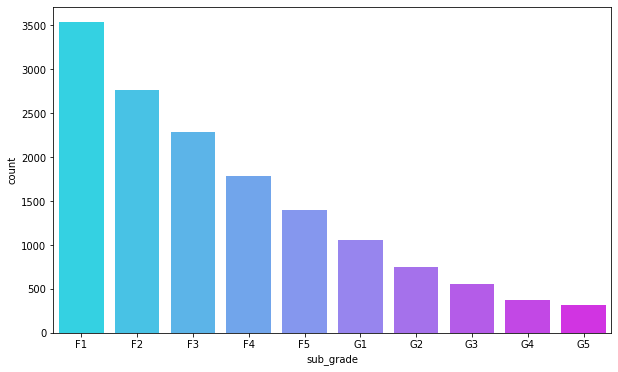

In [147]:
f_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

plt.figure(figsize=(10,6))
sub_grade_ord = sorted(f_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_g, order=sub_grade_ord, palette = 'cool')

In [148]:
df['loan_repaid'] = df['loan_status'].map({"Fully Paid": 1, "Charged Off": 0})

In [149]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


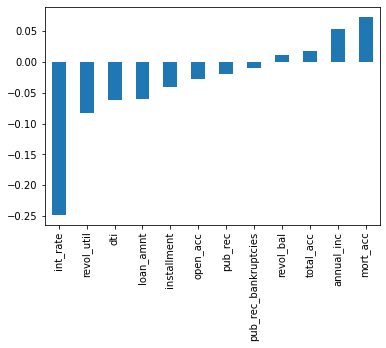

In [150]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [151]:
len(df)

396030

In [152]:
#check for missing data
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [153]:
(df.isnull().sum() / len(df)) * 100 #actual percentages

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [154]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [155]:
df['emp_title'].nunique() #too many unique titles to create dummies

173105

In [156]:
df['emp_title'].value_counts()

Teacher                              4389
Manager                              4250
Registered Nurse                     1856
RN                                   1846
Supervisor                           1830
                                     ... 
AMETEK Land Inc.                        1
AMS                                     1
Knox Clinic Pediatrics                  1
R&R Trucking                            1
Dunn Southeast, dba RJ Griffin&Co       1
Name: emp_title, Length: 173105, dtype: int64

In [157]:
df = df.drop('emp_title', axis = 1)

In [158]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [159]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

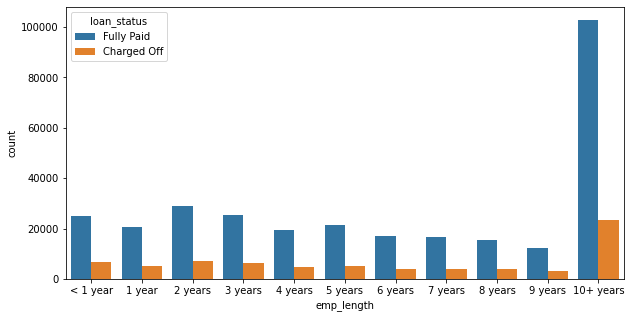

In [160]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data = df, order = emp_length_order, hue='loan_status')

In [161]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [162]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [163]:
emp_len = emp_co / (emp_co + emp_fp)

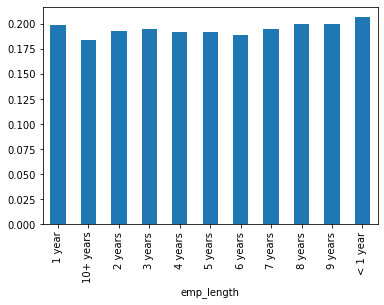

In [164]:
emp_len.plot(kind='bar')

In [165]:
df=df.drop('emp_length', axis = 1)

In [166]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [167]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [168]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [169]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [170]:
feat_info('title')

The loan title provided by the borrower


In [171]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [172]:
df=df.drop('title', axis = 1)

In [173]:
feat_info('mort_acc')

Number of mortgage accounts.


In [174]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [175]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [176]:
total_acc_avg =df.groupby('total_acc').mean()['mort_acc']

In [177]:
def mort_acc_impute(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc


In [178]:
df['mort_acc'] = df.apply(lambda x: mort_acc_impute(x['total_acc'], x['mort_acc']), axis = 1)

In [179]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [180]:
df = df.dropna()

In [181]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [182]:
# Categorical data preprocessing

In [183]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [184]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [185]:
df['term'] = df['term'].apply(lambda t: int(t[:3]))

In [186]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [187]:
df = df.drop('grade', axis = 1)

In [188]:
dummy = pd.get_dummies(df['sub_grade'], drop_first = True)

df = pd.concat([df.drop('sub_grade', axis = 1), dummy], axis = 1)

In [189]:
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']], drop_first = True)

df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'], axis = 1), dummies], axis = 1)

In [190]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [191]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [192]:
dummy_ho = pd.get_dummies(df['home_ownership'], drop_first = True)

df = pd.concat([df.drop('home_ownership', axis = 1), dummy_ho], axis = 1)

In [193]:
df['zip_code'] = df['address'].apply(lambda add:add[-5:])

In [194]:
dummy_zc = pd.get_dummies(df['zip_code'], drop_first = True)

df = pd.concat([df.drop('zip_code', axis = 1), dummy_zc], axis = 1)

In [195]:
df = df.drop('address', axis = 1)

In [196]:
df = df.drop('issue_d', axis = 1)

In [197]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [198]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda d: int(d[-4:]))

In [199]:
# create training and testing data and normalize
from sklearn.model_selection import train_test_split

In [200]:
df = df.drop('loan_status', axis = 1)

In [201]:
df = df.sample(frac = 0.1, random_state = 101)

In [202]:
x = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

In [204]:
y.shape

(39522,)

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [206]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# create the DNN model

In [208]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [210]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer ='adam')

In [211]:
model.fit(x=x_train, y=y_train, epochs=25, batch_size=256, validation_data = (x_test, y_test))

Epoch 1/25
124/124 [==============================] - 1s 4ms/step - loss: 0.5217 - val_loss: 0.3754
Epoch 2/25
124/124 [==============================] - 0s 3ms/step - loss: 0.3427 - val_loss: 0.2901
Epoch 3/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2924 - val_loss: 0.2803
Epoch 4/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2794 - val_loss: 0.2754
Epoch 5/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2754 - val_loss: 0.2742
Epoch 6/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2726 - val_loss: 0.2731
Epoch 7/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2709 - val_loss: 0.2748
Epoch 8/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2697 - val_loss: 0.2725
Epoch 9/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2669 - val_loss: 0.2714
Epoch 10/25
124/124 [==============================] - 0s 3ms/step - loss: 0.2649 - val_loss: 0.2720

In [212]:
#save model
# from tensorflow.keras.models import load_model

In [213]:
loss_df = pd.DataFrame(model.history.history)

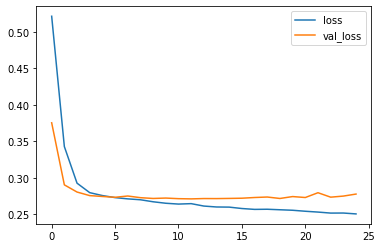

In [214]:
loss_df.plot()

In [215]:
#loss is on training set and val_loss is on test_set

In [216]:
from sklearn.metrics import classification_report, confusion_matrix

In [217]:
pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [218]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.47      0.60      1570
           1       0.88      0.98      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.86      0.72      0.76      7905
weighted avg       0.87      0.88      0.86      7905



In [220]:
print(confusion_matrix(y_test, pred))

[[ 733  837]
 [ 133 6202]]


In [224]:
import random
random.seed(101)
rand_ind = random.randint(0, len(df))

new_c = df.drop('loan_repaid', axis = 1).iloc[rand_ind]
new_c

loan_amnt      25000.00
term              36.00
int_rate           7.90
installment      782.26
annual_inc     62000.00
                 ...   
30723              0.00
48052              0.00
70466              1.00
86630              0.00
93700              0.00
Name: 385487, Length: 78, dtype: float64

In [226]:
new_c = scaler.transform(new_c.values.reshape(1, 78))

In [227]:
model.predict_classes(new_c)

array([[1]], dtype=int32)

In [228]:
df.iloc[rand_ind]['loan_repaid']

1.0